# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

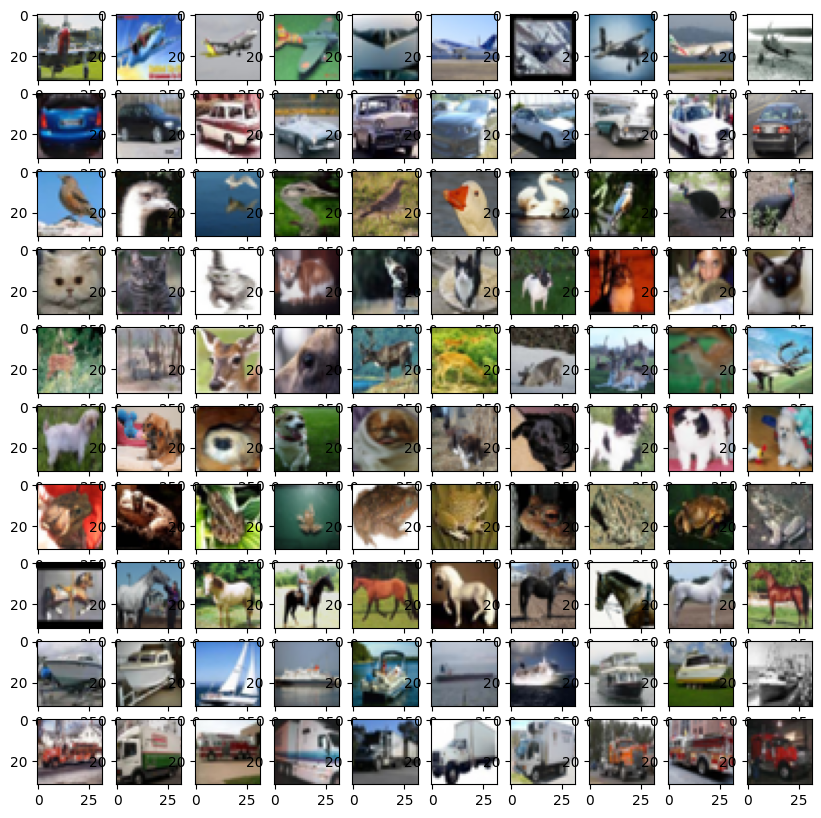

In [2]:
# Your code here :
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
#Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
for i in range(10):
   random_indices = np.random.choice(np.where(y_train == i)[0], size=10, replace=False)
   for j, idx in enumerate(random_indices):
       axes[i, j].imshow(x_train[idx])

In [3]:
#Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
#Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Your code here :
from tensorflow.keras.optimizers import SGD

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

In [8]:
# Your code here :
history = model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.1
)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.1531 - loss: 2.2669 - val_accuracy: 0.2230 - val_loss: 2.1758
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2354 - loss: 2.1542 - val_accuracy: 0.2510 - val_loss: 2.0826
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2731 - loss: 2.0606 - val_accuracy: 0.3116 - val_loss: 2.0055
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3102 - loss: 1.9816 - val_accuracy: 0.3218 - val_loss: 1.9477
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3322 - loss: 1.9275 - val_accuracy: 0.3216 - val_loss: 1.9198
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3430 - loss: 1.9000 - val_accuracy: 0.3330 - val_loss: 1.8902
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3536 - loss: 1.8619 - val_accuracy: 0.3598 - val_loss: 1.8533
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3675 - loss: 1.8388 - val_accuracy: 0.3508 - v

*   Plot the cross entropy loss curve and the accuracy curve

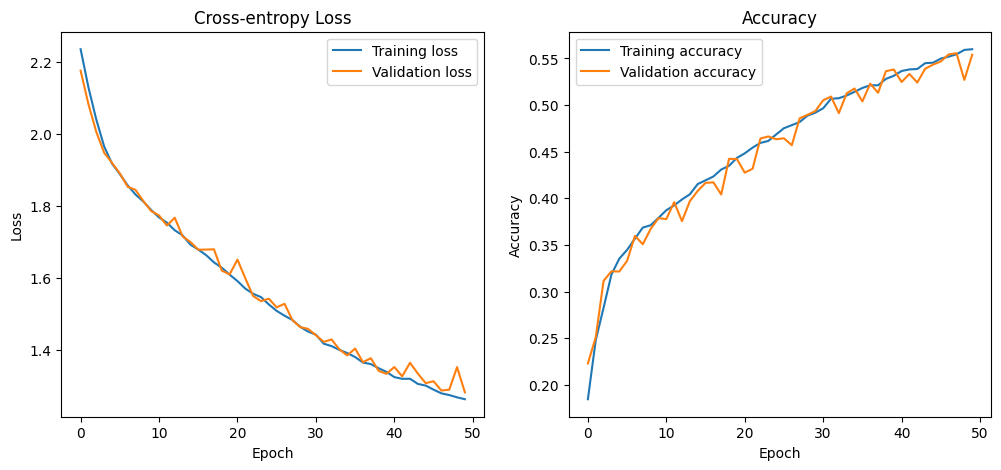

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Cross-entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
# Your code here :
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5470 - loss: 1.2853
Test accuracy: 0.5468000173568726


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
# Your code here :
# Define VGG-like deeper model
model1 = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # First block: two conv layers with 32 filters, 3x3 kernel, same padding, ReLU
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten before dense layers
    layers.Flatten(),

    # Dense layer with 128 units and ReLU
    layers.Dense(128, activation='relu'),

    # Output classification layer with 10 units and softmax
    layers.Dense(10, activation='softmax')
])

model1.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# Your code here :
model1.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)
history1 = model1.fit(
    x_train, y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.1
)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.1326 - loss: 2.2716 - val_accuracy: 0.2116 - val_loss: 2.1606
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2552 - loss: 2.1041 - val_accuracy: 0.2844 - val_loss: 1.9965
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2922 - loss: 1.9884 - val_accuracy: 0.3276 - val_loss: 1.9100
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3272 - loss: 1.9074 - val_accuracy: 0.3342 - val_loss: 1.8897
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3468 - loss: 1.8595 - val_accuracy: 0.3226 - val_loss: 1.8761
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3592 - loss: 1.8140 - val_accuracy: 0.3762 - val_loss: 1.7950
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3754 - loss: 1.7765 - val_accuracy: 0.3788 - val_loss: 1.7688
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3885 - loss: 1.7466 - val_accuracy: 0.3774 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [14]:
# Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation
import matplotlib.pyplot as plt


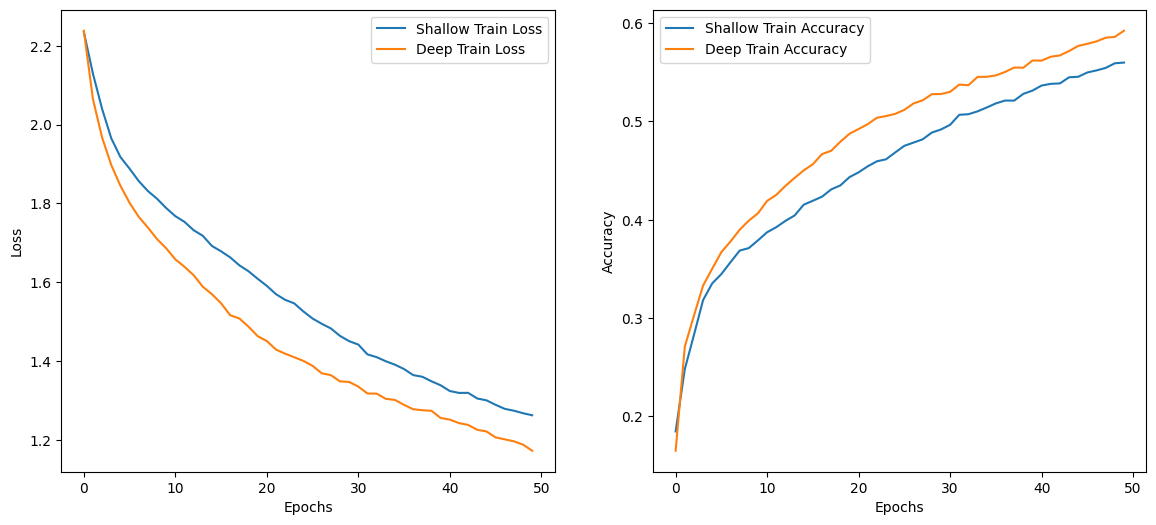

In [15]:
# Your code here :
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Shallow Train Loss')
#plt.plot(history.history['val_loss'], label='Shallow Val Loss')
plt.plot(history1.history['loss'], label='Deep Train Loss')
#plt.plot(history1.history['val_loss'], label='Shallow Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Shallow Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Shallow Val Accuracy')
plt.plot(history1.history['accuracy'], label='Deep Train Accuracy')
#plt.plot(history1.history['val_accuracy'], label='Shallow Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

..Loss Plot (left):
The deeper model (orange) has a consistently lower training loss than the shallow model (blue), which suggests it is learning better and fitting the training data more effectively.

Accuracy Plot (right):
The deeper model (orange) also achieves higher training accuracy throughout the epochs, indicating better performance..

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


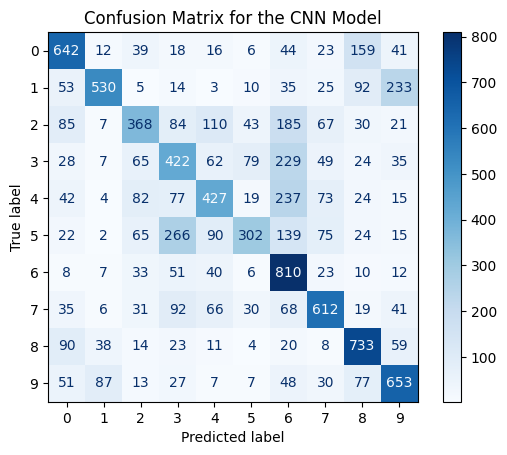

In [16]:
#Use predict function to predict the output for the test split
predictions  = model1.predict(x_test)

#Plot the confusion matrix for the new model and comment on the class confusions.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
np.set_printoptions(precision=2)

# Predict the classes for the test set
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_normalized

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for the CNN Model")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [17]:
# Your code here :
test_loss1, test_accuracy1 = model1.evaluate(x_test, y_test)
print("Test accuracy1:", test_accuracy1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5561 - loss: 1.2596
Test accuracy1: 0.5498999953269958


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

In [19]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
num_classes = 10  # Adjust this as needed
input_shape = (64, 64, 3)

model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [20]:
# Your code here :
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train = tf.image.resize(X_train, (64, 64)).numpy()
X_test = tf.image.resize(X_test, (64, 64)).numpy()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [21]:

model2.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

In [22]:
history2 = model2.fit(
    X_train, y_train_cat,
    batch_size=512,
    epochs=10,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
88/88 - 108s - 1s/step - accuracy: 0.1350 - loss: 2.3002 - val_accuracy: 0.1538 - val_loss: 2.2963
Epoch 2/10
88/88 - 31s - 358ms/step - accuracy: 0.1573 - loss: 2.2920 - val_accuracy: 0.1582 - val_loss: 2.2836
Epoch 3/10
88/88 - 41s - 466ms/step - accuracy: 0.1759 - loss: 2.2633 - val_accuracy: 0.2004 - val_loss: 2.2198
Epoch 4/10
88/88 - 32s - 361ms/step - accuracy: 0.2259 - loss: 2.1520 - val_accuracy: 0.2316 - val_loss: 2.1036
Epoch 5/10
88/88 - 31s - 358ms/step - accuracy: 0.2658 - loss: 2.0567 - val_accuracy: 0.2894 - val_loss: 1.9955
Epoch 6/10
88/88 - 32s - 358ms/step - accuracy: 0.2962 - loss: 1.9873 - val_accuracy: 0.3260 - val_loss: 1.9178
Epoch 7/10
88/88 - 31s - 358ms/step - accuracy: 0.3258 - loss: 1.9156 - val_accuracy: 0.3534 - val_loss: 1.8577
Epoch 8/10
88/88 - 31s - 358ms/step - accuracy: 0.3417 - loss: 1.8619 - val_accuracy: 0.3570 - val_loss: 1.8115
Epoch 9/10
88/88 - 41s - 470ms/step - accuracy: 0.3580 - loss: 1.8126 - val_accuracy: 0.3718 - val_loss: 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


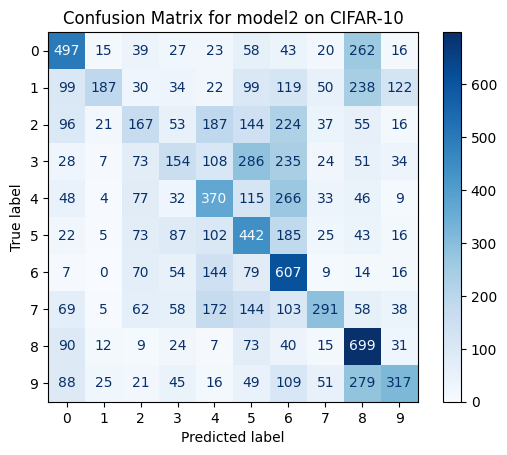

In [23]:
# Predict class probabilities
y_pred_prob = model2.predict(X_test)

# Convert predictions and true labels from one-hot to class indices
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for model2 on CIFAR-10")
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions: (Activation functions introduce non-linearity into a neural network)
Without activation functions, a neural network becomes just a stack of linear functions — which means it could only learn linear relationships.

With non-linear activation functions (like ReLU, sigmoid), networks can learn complex patterns, such as curves, edges, textures, or semantic meaning



_

2 - Key Differences between sigmoid and softmax:
Binary problems (Yes/No, Spam/Not Spam)
Multi-class (Digit classification, Animal types)



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
binary_crossentropy: For binary (2-class) classification problems.  With a single sigmoid output. Labels are 0 or 1.
Use categorical_crossentropy: For multi-class classification.  With a softmax output layer (e.g., 10 neurons for CIFAR-10). Labels must be one-hot encoded.


_
